#### FINAL PROJECT:
# UNDERSTANDING BIKE SHARE IN LOS ANGELES


#### Oleh: Nadya Rizki Fadilah


#### Datasets: Bike Share Trips 2019 (Los Angeles) 
sumber data: https://bikeshare.metro.net/about/data/

<b>Tujuan:</b>
1. Memprediksi demand di stasiun bike share berdasarkan karakteristik stasiun dan hari
2. Mengetahui faktor-faktor karakteristik stasiun yang mempengaruhi demand  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import requests
pd.set_option("display.max_rows", 999)
pd.set_option("display.max_columns", 120)
import time
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OrdinalEncoder
import folium

# PART ONE -  DATA PREPARATION

## 0. Importing and Sampling Data

Data tersebar di 4 CSV dimana masing-masing CSV mewakili data satu quartal:
- q1 = Jan - Maret
- q2 = April - Juni
- q3 = Juli - September
- q4 = November  - Desember

In [2]:
dfq1 = pd.read_csv('metro-bike-share-trips-2019-q1.csv').sample(n=20000, random_state=1)
dfq2 = pd.read_csv('metro-bike-share-trips-2019-q2.csv').sample(n=20000, random_state=1)
dfq3 = pd.read_csv('metro-bike-share-trips-2019-q3.csv').sample(n=20000, random_state=1)
dfq4 = pd.read_csv('metro-bike-share-trips-2019-q4.csv').sample(n=20000, random_state=1)

c:\users\user1\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Memastikan dataframe memiliki kolom dan format yang sama:

In [3]:
dfq1.head(2)

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
57078,118546618,9,2019-03-31 14:57:00,2019-03-31 15:06:00,3047,34.039982,-118.266403,3031,34.044701,-118.252441,05806,30,One Way,Monthly Pass,standard
13320,114082839,9,2019-01-24 06:25:00,2019-01-24 06:34:00,3005,34.048500,-118.258537,3075,34.042110,-118.256187,12197,1,One Way,Walk-up,standard


In [4]:
dfq2.head(2)

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
13143,119969782,8,2019-04-21 16:08:00,2019-04-21 16:16:00,3040,34.053570,-118.266357,3031,34.044701,-118.252441,6492,1,One Way,Walk-up,standard
13443,120020198,40,2019-04-22 10:11:00,2019-04-22 10:51:00,3067,34.045181,-118.250237,3078,34.064281,-118.238937,12102,1,One Way,Walk-up,standard


In [5]:
dfq3.head(2)

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
49305,127642188,2,8/21/2019 5:25,8/21/2019 5:27,3064,34.046810,-118.256981,3007,34.05048,-118.254593,19131,365,One Way,Annual Pass,electric
17340,125773553,4,7/19/2019 23:46,7/19/2019 23:50,3032,34.049889,-118.255882,3006,34.04554,-118.256668,5988,1,One Way,Walk-up,standard


In [6]:
dfq4.head(2)

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
6832,130369347,10,2019-10-06 17:43:43,2019-10-06 17:53:15,3051,34.045422,-118.253517,3038,34.046822,-118.248352,16724,30,One Way,Monthly Pass,electric
65257,134115716,4,2019-12-15 19:01:36,2019-12-15 19:05:29,3074,34.044170,-118.261169,3005,34.048500,-118.258537,19895,30,One Way,Monthly Pass,electric


Dari 4 data frame di atas dapat dilihat bahwa <b>format waktu</b> di dfq3 berbeda dengan format waktu di dataframe lainnya. Untuk menghindari masalah nantinya maka format waktu perlu diubah terlebih dahulu.<br>

<b> Menyamakan format waktu dan memasukan datetime </b>

In [7]:
dfq1['start_time'] = dfq1['start_time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S')) 
dfq2['start_time'] = dfq2['start_time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S')) 
dfq3['start_time'] = dfq3['start_time'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y %H:%M')) 
dfq4['start_time'] = dfq4['start_time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S')) 

dfq1['end_time'] = dfq1['end_time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S')) 
dfq2['end_time'] = dfq2['end_time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S')) 
dfq3['end_time'] = dfq3['end_time'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y %H:%M')) 
dfq4['end_time'] = dfq4['end_time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S')) 

dfq3['start_time'] = dfq3['start_time'].apply(lambda x: x.strftime('%Y-%m-%d %H:%M:%S'))
dfq3['end_time'] = dfq3['end_time'].apply(lambda x: x.strftime('%Y-%m-%d %H:%M:%S'))
dfq3['start_time'] = dfq3['start_time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S')) 
dfq3['end_time'] = dfq3['end_time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))


<b>Menggabungkan data</b>

In [8]:
df = pd.concat([dfq1, dfq2, dfq3, dfq4], axis = 0)

## 1. Memeriksa dan Mengatasi Nilai Null

In [9]:
df.isna().sum()

trip_id                   0
duration                  0
start_time                0
end_time                  0
start_station             0
start_lat              1258
start_lon              1258
end_station               0
end_lat                2770
end_lon                2770
bike_id                   0
plan_duration             0
trip_route_category       0
passholder_type           0
bike_type                 0
dtype: int64

Terdapat nilai null pada titik koordinat Start Station dan End Station. Mengingat kedua data tersebut penting untuk pemetaan nantinya, maka nilai null tersebut perlu untuk dicari lebih lanjut. 

In [10]:
startstat = []
for i in range(len(df[df['start_lat'].isnull()])):
       startstat.append(df[df['start_lat'].isnull()].iloc[i]['start_station'])
        
endstat = []
for i in range(len(df[df['end_lat'].isnull()])):
       endstat.append(df[df['end_lat'].isnull()].iloc[i]['end_station'])
        
print (set(endstat))
print (set(startstat))

{3000, 4285, 4286}
{3000, 4285, 4286}


Diketahui bahwa longitude dan latititude stasiun yang tidak diketahui pada end dan start stasiun merupakan stasiun yang sama. Metro Bike Share menyediakan file csv untuk membantu mengidentifikasi lokasi stasiun lebih lanjut: 

In [11]:
dfst = pd.read_csv('metro-bike-share-stations-2020-01-01.csv')

print(dfst[dfst['Station_ID']==list(set(startstat))[0]]['Station_Name'].iloc[0])
print(dfst[dfst['Station_ID']==list(set(startstat))[1]]['Station_Name'].iloc[0])
print(dfst[dfst['Station_ID']==list(set(startstat))[2]]['Station_Name'].iloc[0])

Virtual Station
Metro Bike Share Free Bikes
Metro Bike Share Out of Service Area Smart Bike


Pada website Metro Bike Share terdapat informasi bahwa "Virtual Station is used by staff to check in or check out a bike remotely for a special event". Dapat disimpulkan bahwa ketiga stasiun ini bukan merupakan stasiun regular sehingga lebih baik untuk drop rows. 

In [12]:
df.dropna(axis =0, inplace=True)

## 2. Menambahkan Data dari Sumber Eksternal
Pada bagian ini kita akan menambahkan data dari sumber eksternal untuk memperkaya informasi: 
1. Region Station (dari data Metro Bike Share)
2. Temperatur dan Cuaca (dari API National Centers for Environmental Information)
3. Karakteristik Station (Walk Score, Bike Score, Transit Score) (dari walkscore.com)

#### 2.1 Menambahkan Region Stasiun

Menambahkan Region Stasiun berdasarkan data yang disediakan Metro Bike Share

Saat menjalankan algoritma di penambahan keterangan Region, diketahui bahwa terdapat 7 station id yang tidak terdapat di data yang disediakan oleh Metro Bike LA (di CSV maupun di Website). Mengingat hanya ada 20 trip yang berasal/berakhir di stasiun-stasiun tersebut maka diputuskan untuk drop row tersebut.

In [13]:
print('jumlah trip di stasiun 4327: start: ',len(df[df['start_station'] == 4327]), ' end: ', len(df[df['end_station'] == 4327]))
df = df[df['start_station']!=4327]
df = df[df['end_station']!=4327]

print('jumlah trip di stasiun 4362: start: ',len(df[df['start_station'] == 4362]), ' end: ', len(df[df['end_station'] == 4362]))
df = df[df['start_station']!=4362]
df = df[df['end_station']!=4362]

print('jumlah trip di stasiun 4363: start: ',len(df[df['start_station'] == 4363]), ' end: ', len(df[df['end_station'] == 4363]))
df = df[df['start_station']!=4363]
df = df[df['end_station']!=4363]

print('jumlah trip di stasiun 4108: start: ',len(df[df['start_station'] == 4108]), ' end: ', len(df[df['end_station'] == 4108]))
df = df[df['start_station']!=4108]
df = df[df['end_station']!=4108]

print('jumlah trip di stasiun 4321: start: ',len(df[df['start_station'] == 4321]), ' end: ', len(df[df['end_station'] == 4321]))
df = df[df['start_station']!=4321]
df = df[df['end_station']!=4321]

print('jumlah trip di stasiun 4467: start: ',len(df[df['start_station'] == 4467]), ' end: ', len(df[df['end_station'] == 4467]))
df = df[df['start_station']!=4467]
df = df[df['end_station']!=4467]

print('jumlah trip di stasiun 4468: start: ',len(df[df['start_station'] == 4468]), ' end: ', len(df[df['end_station'] == 4468]))
df = df[df['start_station']!=4468]
df = df[df['end_station']!=4468]

jumlah trip di stasiun 4327: start:  1  end:  0
jumlah trip di stasiun 4362: start:  0  end:  0
jumlah trip di stasiun 4363: start:  6  end:  2
jumlah trip di stasiun 4108: start:  4  end:  4
jumlah trip di stasiun 4321: start:  0  end:  0
jumlah trip di stasiun 4467: start:  0  end:  3
jumlah trip di stasiun 4468: start:  0  end:  1


In [14]:
df['reg_start'] = df['start_station'].apply(lambda x: dfst[dfst['Station_ID']==x]['Region '].iloc[0])
df['reg_end'] = df['end_station'].apply(lambda x: dfst[dfst['Station_ID']==x]['Region '].iloc[0])

In [15]:
df['time'] = df['start_time'].apply(lambda x: x.hour)

#### 2.2 Menambahkan Cuaca 

Menambahkan temperatur dan hujan berdasarkan tanggal. Data didapatkan dari API yang disediakan oleh https://www.ncdc.noaa.gov/

Data yg dihasilkan:
- Temperatur : (1/10 C) -> C
- Precipitation: (1/10 mm) -> Inch

In [16]:
token = 'PmAArvbxiZiycuIFQMBIqUJauXgJhAEC'
station_id = 'GHCND:USW00093134' # station Downtown Los Angeles
baseurl = 'https://www.ncdc.noaa.gov/cdo-web/api/v2/data?'
datasetid = 'GHCND'
datatypeid0 = 'TMIN' ## minimum temperature
datatypeid1 = 'TMAX' ## maximum temperature
datatypeid2 = 'PRCP' ## percipitation
url1 = baseurl+'datasetid='+datasetid+'&datatypeid='+datatypeid1+'&limit=1000&stationid='+station_id+'&startdate=2019-01-01&enddate=2019-12-31'
url2 = baseurl+'datasetid='+datasetid+'&datatypeid='+datatypeid2+'&limit=1000&stationid='+station_id+'&startdate=2019-01-01&enddate=2019-12-31'
url0 = baseurl+'datasetid='+datasetid+'&datatypeid='+datatypeid0+'&limit=1000&stationid='+station_id+'&startdate=2019-01-01&enddate=2019-12-31'
headers={'token': token}

In [17]:
data0 = requests.get(url0, headers={'token': token})
data0 = data0.json()
date0 = []
tempmin = []
for i in data0['results']:
    tempmin.append(i['value']/10)
    date0.append(i['date'])

data1 = requests.get(url1, headers={'token': token})
data1 = data1.json()
data1
date1 = []
tempmax = []
for i in data1['results']:
    tempmax.append(i['value']/10)
    date1.append(i['date'])
    
data2 = requests.get(url2, headers={'token': token})
data2 = data2.json()
data2
pcp = []
date2 = []
for i in data2['results']:
    pcp.append(round(i['value']/10/25.4, 2))
    date2.append(i['date'])

In [18]:
dfcuaca = pd.DataFrame()
dfcuaca['date'] = date1
dfcuaca['temp_max'] = tempmax
dfcuaca['temp_min'] = tempmin
dfcuaca['pcp'] = pcp
dfcuaca['date'] = dfcuaca['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%S'))
dfcuaca['date'] = dfcuaca['date'].apply(lambda x: x.strftime('%Y-%m-%d %H:%M:%S'))
dfcuaca['date'] = dfcuaca['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))


In [19]:
df['date'] = df['start_time'].apply(lambda x: x.date())

In [20]:
df['tempmax'] = df['date'].apply(lambda x: dfcuaca[dfcuaca['date'] == x]['temp_max'].iloc[0])
df['tempmin'] = df['date'].apply(lambda x: dfcuaca[dfcuaca['date'] == x]['temp_min'].iloc[0])
df['pcp'] = df['date'].apply(lambda x: dfcuaca[dfcuaca['date'] == x]['pcp'].iloc[0])

<ipython-input-20-48bbe40457f4>:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  df['tempmax'] = df['date'].apply(lambda x: dfcuaca[dfcuaca['date'] == x]['temp_max'].iloc[0])
<ipython-input-20-48bbe40457f4>:2: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  df['tempmin'] = df['date'].apply(lambda x: dfcuaca[dfcuaca['date'] == x]['temp_min'].iloc[0])
<ipython-input-20-48bbe40457f4>:3: FutureWarning: Comparing Series of datetimes with 'datetime.d

#### 2.3 Menambahkan Karakteristik Stasiun

Untuk memperkaya analisis, perlu ditambahkan karakteristik dari setiap-setiap stasiun

In [21]:
uniquestat = list (df['start_station'].unique()) + list(df['end_station'].unique())
uniquestat = list(set(uniquestat))
len(uniquestat)

226

Pada data LA Metro Bike Share terdapat 275 stasiun, namun pada datasets yang digunakan hanya terdapat 226 stasiun. Hal ini disebabkan terdapat beberapa stasiun yang sudah tidak aktif. 

<b> 2.3.1 Membuat DataFrame Stasiun </b><br>

Membuat Dataframe tentang informasi per stasiun untuk memudahkan memasukan data selanjutnya

In [22]:
statname = []
statlat = []
statlong = []
statid=[]
statreg = []

for i in list (df['start_station'].unique()): 
    statid.append(i)
    statname.append(dfst[dfst['Station_ID']==i]['Station_Name'].iloc[0])
    statlat.append(df[df['start_station']==i]['start_lat'].iloc[0])
    statlong.append(df[df['start_station']==i]['start_lon'].iloc[0])
    statreg.append(df[df['start_station']==i]['reg_start'].iloc[0])
    
for i in list (df['end_station'].unique()): 
    statid.append(i)
    statname.append(dfst[dfst['Station_ID']==i]['Station_Name'].iloc[0])
    statlat.append(df[df['end_station']==i]['end_lat'].iloc[0])
    statlong.append(df[df['end_station']==i]['end_lon'].iloc[0])
    statreg.append(df[df['end_station']==i]['reg_end'].iloc[0])

dfstat = pd.DataFrame()
dfstat['statid'] = statid
dfstat['name'] =statname
dfstat['statlat'] = statlat
dfstat['statlong'] = statlong
dfstat['statreg'] = statreg
dfstat = dfstat.drop_duplicates()

<b>2.3.2 Menambahkan Walking Score, Biking Score, Transit Score </b> 

Sumber data: https://www.walkscore.com/<br>
Tujuan: Menggambarkan kondisi di sekitar stasiun yang berpotensi mempengaruhi penggunaan sepeda.<br><br>
Variabel yang ditambahkan: 
1. Walking Score: Measures walkability on a scale from 0 - 100 based on walking routes to destinations such as grocery stores, schools, parks, restaurants, and retail.
2. Transit Score: Measures transit accessibility on a scale from 0 - 100. Calculates distance to closest stop on each route, analyzes route frequency and type.
3. Measures bike accessibility on a scale from 0 - 100 based on bike infrastructure, topography, destinations and road connectivity.


In [23]:
dfscore = pd.read_excel('StationScore.xlsx')
dfscore.head(3)

,statid,Walk,Transit,Bike
0,3030,93,100.0,74
1,3066,96,87.0,56
2,3082,93,96.0,73


In [24]:
dfstat['walk_score'] =  dfstat['statid'].apply(lambda x: dfscore[dfscore['statid']==x]['Walk'].iloc[0])  
dfstat['transit_score'] =  dfstat['statid'].apply(lambda x: dfscore[dfscore['statid']==x]['Transit'].iloc[0])   
dfstat['bike_score'] =  dfstat['statid'].apply(lambda x: dfscore[dfscore['statid']==x]['Bike'].iloc[0])   

<b>2.3.3 Memeriksa Nilai Null </b>

In [25]:
dfstat.isna().sum()

statid           0
name             0
statlat          0
statlong         0
statreg          0
walk_score       0
transit_score    6
bike_score       0
dtype: int64

Terdapat nilai null untuk 6 stasiun pada transit score:

In [26]:
dfstat[dfstat['transit_score'].isnull()]

,statid,name,statlat,statlong,statreg,walk_score,transit_score,bike_score
111,4341,7th & Westminster,33.995300,-118.464844,Westside,95,NaN,96
124,4342,Abbot Kinney & Cadiz,33.991161,-118.468292,Westside,94,NaN,99
137,4380,Centinela & Lucile,33.982922,-118.410927,Westside,60,NaN,82
173,4420,North Hollywood Station,34.168629,-118.377068,North Hollywood,91,NaN,73
181,4419,Magnolia & Clybourn,34.165218,-118.355148,North Hollywood,71,NaN,71
190,4432,Public Bike Rack: Universal City/Studio City R...,34.139568,-118.362251,North Hollywood,53,NaN,24


Nilai null hanya terdapat pada stasiun di region Westside dan North Hollywood

In [27]:
# for i in range(len(dfstat[dfstat['transit_score'].isnull()]))

for i in dfstat[dfstat['transit_score'].isnull()].index:
    if dfstat.loc[i]['statreg']=='Westside':
        dfstat['transit_score'].loc[i] = dfstat[dfstat['statreg']=='Westside']['transit_score'].mean()
    elif dfstat.loc[i]['statreg']=='North Hollywood':
        dfstat['transit_score'].loc[i] = dfstat[dfstat['statreg']=='North Hollywood']['transit_score'].mean()

c:\users\user1\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [28]:
dfstat.isna().sum()

statid           0
name             0
statlat          0
statlong         0
statreg          0
walk_score       0
transit_score    0
bike_score       0
dtype: int64

## 3. Menambahkan Variabel Turunan

#### 3.1 Menambahkan variable 'dist_center' untuk setiap stasiun</b><br>


In [29]:
dfstat['statreg'].unique()

array(['DTLA', 'Port of LA', 'Westside', 'North Hollywood'], dtype=object)

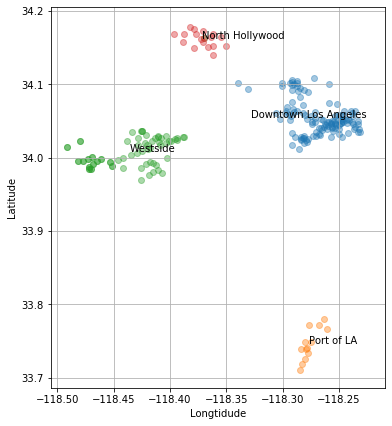

In [30]:
plt.figure(figsize = (6,7))
plt.scatter(dfstat[dfstat['statreg']=='DTLA']['statlong'], dfstat[dfstat['statreg']=='DTLA']['statlat'],alpha=0.4)
plt.scatter(dfstat[dfstat['statreg']=='Port of LA']['statlong'], dfstat[dfstat['statreg']=='Port of LA']['statlat'],alpha=0.4)
plt.scatter(dfstat[dfstat['statreg']=='Westside']['statlong'], dfstat[dfstat['statreg']=='Westside']['statlat'],alpha=0.4)
plt.scatter(dfstat[dfstat['statreg']=='North Hollywood']['statlong'], dfstat[dfstat['statreg']=='North Hollywood']['statlat'],alpha=0.4)

plt.annotate('Port of LA', (dfstat[dfstat['statreg']=='Port of LA']['statlong'].mean(), dfstat[dfstat['statreg']=='Port of LA']['statlat'].mean()))
plt.annotate('Downtown Los Angeles', (dfstat[dfstat['statreg']=='DTLA']['statlong'].mean()-0.06, dfstat[dfstat['statreg']=='DTLA']['statlat'].mean()))
plt.annotate('Westside', (dfstat[dfstat['statreg']=='Westside']['statlong'].mean(), dfstat[dfstat['statreg']=='Westside']['statlat'].mean()))
plt.annotate('North Hollywood', (dfstat[dfstat['statreg']=='North Hollywood']['statlong'].mean(), dfstat[dfstat['statreg']=='North Hollywood']['statlat'].mean()))
plt.xlabel('Longtidude')
plt.ylabel('Latitude')
plt.grid(True)

Dari scatter plot di atas dapat dilihat bahwa stasiun peminjaman sepeda di masing-masing regional membentuk suatu cluster.

In [31]:
print ('Dari jumlah total ', len(df), ' perjalanan, hanya terdapat ', len(df[df['reg_start']!=df['reg_end']]), ' perjalanan yang lintas region (', round(len(df[df['reg_start']!=df['reg_end']])/len(df)*100, 2), '%)')

Dari jumlah total  76489  perjalanan, hanya terdapat  23  perjalanan yang lintas region ( 0.03 %)


Berdasarkan informasi di atas kita dapat menyimpulkan bahwa sebagian besar perjalanan berada di dalam region. Untuk memberikan gambaran letak stasiun secara spasial terhadap region tersebut dan terhadap sebaran stasiun di dalam region tersebut, kita dapat membuat suatu variabel yang menggambarkan jarak stasiun terhadap 'pusat' stasiun di region tersebut (berdasrkan letak, bukan network).

Distance ke center dihitung dengan pitagoras biasa -> tidak menggambarkan jarak real di atas bumi, hanya sebagai pengukuran dibandingkan titik lainnya.

In [32]:
center_pola_lon = dfstat[dfstat['statreg']=='Port of LA']['statlong'].mean()
center_pola_lat = dfstat[dfstat['statreg']=='Port of LA']['statlat'].mean()
center_dtla_lon = dfstat[dfstat['statreg']=='DTLA']['statlong'].mean()
center_dtla_lat = dfstat[dfstat['statreg']=='DTLA']['statlat'].mean()
center_west_lon = dfstat[dfstat['statreg']=='Westside']['statlong'].mean()
center_west_lat = dfstat[dfstat['statreg']=='Westside']['statlat'].mean()
center_noh_lon = dfstat[dfstat['statreg']=='North Hollywood']['statlong'].mean()
center_noh_lat = dfstat[dfstat['statreg']=='North Hollywood']['statlat'].mean()

In [33]:
dist_c = []
for i in range(len(dfstat)): 
    if dfstat['statreg'].iloc[i] == 'Port of LA':
        dist_c.append(round(np.sqrt(((dfstat.statlong.iloc[i] - center_pola_lon)**2) + ((dfstat.statlat.iloc[i] - center_pola_lat)**2)), 4))
    elif dfstat['statreg'].iloc[i] == 'DTLA':
        dist_c.append(round(np.sqrt(((dfstat.statlong.iloc[i] - center_dtla_lon)**2) + ((dfstat.statlat.iloc[i] - center_dtla_lat)**2)), 4))
    elif dfstat['statreg'].iloc[i] == 'Westside':
        dist_c.append(round(np.sqrt(((dfstat.statlong.iloc[i] - center_west_lon)**2) + ((dfstat.statlat.iloc[i] - center_west_lat)**2)), 4))
    elif dfstat['statreg'].iloc[i] == 'North Hollywood':
        dist_c.append(round(np.sqrt(((dfstat.statlong.iloc[i] - center_noh_lon)**2) + ((dfstat.statlat.iloc[i] - center_noh_lat)**2)), 4))
        
dfstat['dist_creg'] = dist_c

In [34]:
dfcenter = pd.DataFrame([
    {"region": 'DTLA',
    "lat":center_dtla_lat,
    "long": center_dtla_lon},
    {"region": 'Port of LA',
    "lat":center_pola_lat,
    "long": center_pola_lon},
    {"region": 'Westside',
    "lat":center_west_lat,
    "long": center_west_lon},
    {"region": 'North Hollywood',
    "lat":center_noh_lat,
    "long": center_noh_lon}])

dfcenter.to_csv('dfcenter.csv')

#### 3.2 Membedakan Weekend dan Weekday

Dengan asumsi bahwa terdapat perbedaan pola pergerakan masyarakat antara weekend dan weekday, maka data waktu dipisahkan berdasarkan weekend dan weekday:

In [35]:
df['date'] = df['start_time'].apply(lambda x: x.date())

def weekend(x):
    if x.weekday() == 5 or x.weekday() == 6:
        return 1
    else:
        return 0

df['weekend'] = df['date'].apply(weekend)

#### 3.3 Menambahkan Feature Jam

In [36]:
df['hour'] = df['start_time'].apply(lambda x: x.hour)

#### 3.4 Membagi Temperatur Berdasarkan Range

Untuk mempermudah perhitungan, akan dibuat variabel baru untuk mengklasifikasikan temperatur rata-rata

In [37]:
df['temp_avg'] = (df['tempmax'] + df['tempmin'])/2
df['temp_avg'].describe()

count    76489.000000
mean        19.195743
std          4.387156
min          9.700000
25%         16.150000
50%         19.450000
75%         23.050000
max         28.900000
Name: temp_avg, dtype: float64

In [38]:
def temp(x):
    if x <= (df['temp_avg'].mean() - df['temp_avg'].std()):
        return 'cool'
    elif x > (df['temp_avg'].mean() - df['temp_avg'].std()) and x <= (df['temp_avg'].mean() + df['temp_avg'].std()):
        return 'regular'
    elif x > (df['temp_avg'].mean() + df['temp_avg'].std()):
        return 'warm'
    
df['temp_class'] = df['temp_avg'].apply(temp) 

In [39]:
encodertemp = OrdinalEncoder(categories=[['cool', 'regular', 'warm']])

df['temp_class'] = encodertemp.fit_transform(df['temp_class'].values.reshape(-1, 1))

#### 3.5 Menandakan Hari Hujan

Trip dikelompokan berdasarkan Precipitation hari itu, apabila precipitation >=1 maka disimpulkan pada hari tersebut terjadi hujan.

In [40]:
def rain (x):
    if x >= 1:
        return 1
    else:
        return 0

df['rain'] = df['pcp'].apply(rain)

### 4. Feature Exploration

Pada bagian ini akan dilakukan:
1. Gambaran (visualisasi) sederhana untuk menambah pengertian terhadap data yang ada
2. Mengalisis distribusi  data
3. Encoding data categorical/ordinal untuk memudahkan modelling

In [41]:
df.describe()

,trip_id,duration,start_station,start_lat,start_lon,end_station,end_lat,end_lon,plan_duration,time,tempmax,tempmin,pcp,weekend,hour,temp_avg,temp_class,rain
count,7.648900e+04,76489.000000,76489.000000,76489.000000,76489.000000,76489.000000,76489.000000,76489.000000,76489.000000,76489.000000,76489.000000,76489.000000,76489.000000,76489.000000,76489.000000,76489.000000,76489.000000,76489.000000
mean,1.242725e+08,26.725372,3380.542300,34.036530,-118.280747,3381.175947,34.036244,-118.280905,56.930866,13.980115,24.099272,14.292215,0.034021,0.245133,13.980115,19.195743,0.998941,0.008354
std,6.492901e+06,92.686682,565.654642,0.050842,0.069150,565.967701,0.050797,0.069819,106.739329,4.749323,5.210867,4.129163,0.180211,0.430169,4.749323,4.387156,0.616266,0.091019
min,1.125377e+08,1.000000,3005.000000,33.710979,-118.495422,3005.000000,33.710979,-118.495422,1.000000,0.000000,11.100000,3.300000,0.000000,0.000000,0.000000,9.700000,0.000000,0.000000
25%,1.184701e+08,6.000000,3027.000000,34.039871,-118.270813,3027.000000,34.039219,-118.270813,1.000000,11.000000,20.000000,11.700000,0.000000,0.000000,11.000000,16.150000,1.000000,0.000000
50%,1.245931e+08,11.000000,3049.000000,34.046810,-118.256668,3049.000000,34.046612,-118.256668,30.000000,14.000000,23.900000,14.400000,0.000000,0.000000,14.000000,19.450000,1.000000,0.000000
75%,1.300666e+08,21.000000,4135.000000,34.051941,-118.247162,4135.000000,34.050880,-118.246422,30.000000,18.000000,28.300000,17.800000,0.000000,0.000000,18.000000,23.050000,1.000000,0.000000
max,1.349825e+08,1440.000000,4493.000000,34.177662,-118.231277,4493.000000,34.177662,-118.231277,999.000000,23.000000,36.100000,22.800000,2.120000,1.000000,23.000000,28.900000,2.000000,1.000000


In [42]:
df.columns

Index(['trip_id', 'duration', 'start_time', 'end_time', 'start_station',
       'start_lat', 'start_lon', 'end_station', 'end_lat', 'end_lon',
       'bike_id', 'plan_duration', 'trip_route_category', 'passholder_type',
       'bike_type', 'reg_start', 'reg_end', 'time', 'date', 'tempmax',
       'tempmin', 'pcp', 'weekend', 'hour', 'temp_avg', 'temp_class', 'rain'],
      dtype='object')

#### 4.0 Latitude and Longitude 

In [43]:
locs = dfstat[['statlat', 'statlong']]
locslist = locs.values.tolist()

lat = ((df[['start_lat']].max() + df[['start_lat']].min())/2)+0.05
lon = ((df[['start_lon']].max() + df[['start_lon']].min())/2)+0.1

map1 = folium.Map(location=[lat, lon], control_scale=True, zoom_start=[10.15])

for point in range(0, len(locslist)):
    pop  = dfstat['name'][point] , dfstat['statreg'][point]
    if dfstat['statreg'][point] == 'DTLA':
        folium.Marker(locslist[point], popup=pop, icon=folium.Icon(color='cadetblue')).add_to(map1)
    elif dfstat['statreg'][point] == 'Westside':
        folium.Marker(locslist[point], popup=pop, icon=folium.Icon(color='orange')).add_to(map1)
    elif dfstat['statreg'][point] == 'Port of LA':
        folium.Marker(locslist[point], popup=pop, icon=folium.Icon(color='lightblue')).add_to(map1)
    elif dfstat['statreg'][point] == 'North Hollywood':
        folium.Marker(locslist[point], popup=pop, icon=folium.Icon(color='darkpurple')).add_to(map1)
map1

<b>Interaksi antar stasiun: </b>

In [125]:
x = df.groupby(['start_station', 'end_station', 'reg_start', 'reg_end'], as_index=False).count().sort_values(by='trip_id', ascending=False).head(10)
x[['start_station', 'end_station', 'reg_start', 'reg_end', 'trip_id']]

,start_station,end_station,reg_start,reg_end,trip_id
1284,3030,3014,DTLA,DTLA,1396
498,3014,3030,DTLA,DTLA,1209
5568,4345,4345,Westside,Westside,994
5595,4346,4346,Westside,Westside,578
1305,3030,3042,DTLA,DTLA,397
5542,4344,4344,Westside,Westside,392
0,3005,3005,DTLA,DTLA,369
2018,3042,3030,DTLA,DTLA,369
486,3014,3016,DTLA,DTLA,349
558,3016,3014,DTLA,DTLA,348


#### 4.1. Duration


In [44]:
df['duration'].describe()

count    76489.000000
mean        26.725372
std         92.686682
min          1.000000
25%          6.000000
50%         11.000000
75%         21.000000
max       1440.000000
Name: duration, dtype: float64

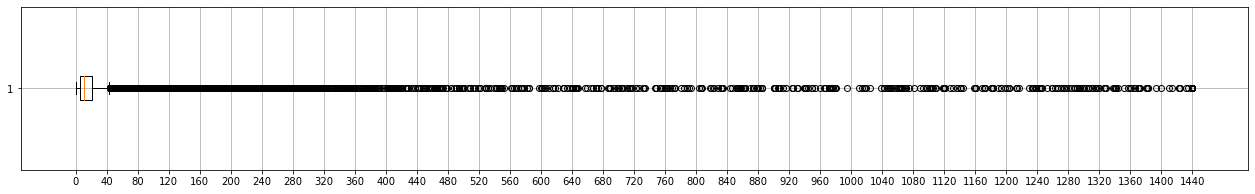

In [45]:
plt.figure(figsize = (22,3))
plt.boxplot(df['duration'], vert=False)
plt.xticks(range(0, 1441, 40))
plt.grid(True)

Boxplot di atas menggambarkan persebaran titik data dimana dapat dilihat bahwa terdapat banyak data yang terletak diluar upper limit (> 1,5 * IQR). Data yang berada di luar upper limit tersebut dianggap sebagai outliers (outliers diukur menggunakan IQR karena terdapat outliers yang sangat besar dan mempengaruhi mean dan standar deviasi, sehingga mean dan standar deviasi tidak bisa menggambarkan sentralitas data).

In [46]:
iqr = np.subtract(*np.percentile(df['duration'], [75, 25]))
print('IQR = ', iqr)
upper = np.percentile(df['duration'], 75) + (1.5 * iqr)
print('upper = ', (np.percentile(df['duration'], 75)) + (1.5 * iqr))
print ('jumlah outlier: ', len(df[df['duration']> upper]),', yaitu', round(len(df[df['duration']>upper])/len(df)*100, 2),'% dari jumlah data')


IQR =  15.0
upper =  43.5
jumlah outlier:  6947 , yaitu 9.08 % dari jumlah data


Karena jumlah outliers cukup besar, dan durasi tidak akan dimasukan ke dalam model, maka diputuskan untuk tidak drop data outliers. 

#### 4.2. Plan Duration

The number of days that the plan the passholder is using entitles them to ride;

<!-- <img_src='pricing.PNG> -->

<img src="pricing.PNG" alt="pricing" width="800"/>
sumber: https://bikeshare.metro.net/pricing/

In [47]:
df['plan_duration'].unique()

array([ 30,   1, 365, 999], dtype=int64)

Terdapat plan duration dengan nilai sebesar 999 (tidak ada pada plan yang tertera pada official website). 

In [48]:
df[df['plan_duration']==999]

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type,reg_start,reg_end,time,date,tempmax,tempmin,pcp,weekend,hour,temp_avg,temp_class,rain
11949,119823134,1,2019-04-19 11:26:00,2019-04-19 11:27:00,4372,34.027882,-118.388901,4372,34.027882,-118.388901,15868,999,Round Trip,Testing,smart,Westside,Westside,11,2019-04-19,22.8,13.9,0.0,0,11,18.35,1.0,0
23797,121292877,1440,2019-05-09 10:52:00,2019-05-11 13:55:00,4383,34.009022,-118.425011,4383,34.009022,-118.425011,15976,999,Round Trip,Testing,smart,Westside,Westside,10,2019-05-09,18.9,15.6,0.0,0,10,17.25,1.0,0
26985,126388082,5,2019-07-30 14:26:00,2019-07-30 14:31:00,4346,33.984341,-118.471550,4346,33.984341,-118.471550,15608,999,Round Trip,Testing,smart,Westside,Westside,14,2019-07-30,28.9,19.4,0.0,0,14,24.15,2.0,0
64517,128481094,24,2019-09-04 09:14:00,2019-09-04 09:38:00,4330,34.025688,-118.395302,4330,34.025688,-118.395302,16237,999,Round Trip,Testing,smart,Westside,Westside,9,2019-09-04,35.0,22.2,0.0,0,9,28.60,2.0,0
6753,125110166,7,2019-07-08 15:36:00,2019-07-08 15:43:00,4344,34.014309,-118.491341,4344,34.014309,-118.491341,15363,999,Round Trip,Testing,smart,Westside,Westside,15,2019-07-08,23.9,18.3,0.0,0,15,21.10,1.0,0
82763,129496147,47,2019-09-21 15:53:00,2019-09-21 16:40:00,4389,34.035351,-118.434143,4345,33.995560,-118.481552,16099,999,One Way,Testing,smart,Westside,Westside,15,2019-09-21,30.6,18.3,0.0,1,15,24.45,2.0,0
58704,128161238,292,2019-08-29 13:45:00,2019-08-29 18:37:00,4420,34.168629,-118.377068,4420,34.168629,-118.377068,15110,999,Round Trip,Testing,smart,North Hollywood,North Hollywood,13,2019-08-29,30.0,20.6,0.0,0,13,25.30,2.0,0
25119,131548279,16,2019-10-26 15:32:09,2019-10-26 15:48:03,4336,34.022449,-118.438332,4354,34.017681,-118.409081,15125,999,One Way,Testing,smart,Westside,Westside,15,2019-10-26,31.7,17.8,0.0,1,15,24.75,2.0,0
24964,131541356,17,2019-10-26 12:58:33,2019-10-26 13:15:28,4344,34.014309,-118.491341,4345,33.995281,-118.479752,15555,999,One Way,Testing,smart,Westside,Westside,12,2019-10-26,31.7,17.8,0.0,1,12,24.75,2.0,0


Setelah dilihat lebih lanjut, perjalanan dengan plan duration = 999 memiliki passholder type = Testing. Karena perjalanan tersebut bukan perjalanan reguler yg dilakukan oleh pelanggan maka data tersebut di-drop. 

In [49]:
df = df[df['plan_duration']!=999]

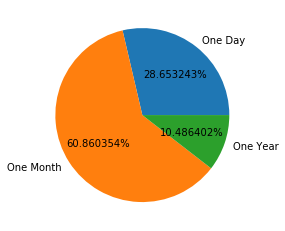

In [50]:
plt.pie([len(df[df['plan_duration'] == 1]), len(df[df['plan_duration'] == 30]), len(df[df['plan_duration'] == 365])],labels= ['One Day', 'One Month', 'One Year'], autopct='%2f%%')
plt.show()

Sebagian besar pelanggan bike share merupakan pelanggan dengan subcription plan bulanan

#### 4.3 Trip Route Category

In [51]:
df['trip_route_category'].unique()

array(['One Way', 'Round Trip'], dtype=object)

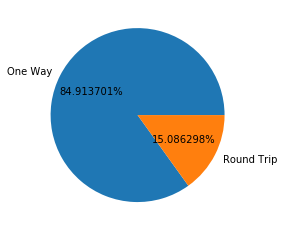

In [52]:
plt.pie([len(df[df['trip_route_category'] == 'One Way']), len(df[df['trip_route_category'] == 'Round Trip'])],labels= ['One Way', 'Round Trip'], autopct='%2f%%')
plt.show()

Secara umum dapat dilihat bahwa sebagian besar perjalanan yang menggunakan bike share di Los Angeles adalah One Way Trip


#### 4.4 Passholder Type

In [53]:
df['passholder_type'].unique()

array(['Monthly Pass', 'Walk-up', 'One Day Pass', 'Annual Pass',
       'Flex Pass'], dtype=object)

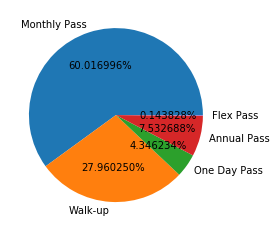

In [54]:
plt.pie([len(df[df['passholder_type'] =='Monthly Pass']), len(df[df['passholder_type'] =='Walk-up']), len(df[df['passholder_type'] =='One Day Pass']),
        len(df[df['passholder_type'] =='Annual Pass']), len(df[df['passholder_type'] =='Flex Pass'])],
       labels= ['Monthly Pass', 'Walk-up', 'One Day Pass', 'Annual Pass', 'Flex Pass'], autopct='%2f%%')
plt.show()

Grafik di atas memperlihatkan bahwa sebagian besar pelanggan menggunakan program langganan bulanan.

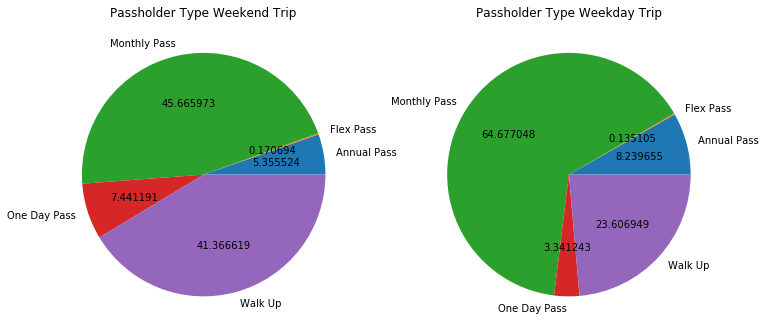

In [55]:
weekpass = df.groupby(['weekend', 'passholder_type'], as_index=False).count()

plt.figure(figsize=(12,10))
plt.subplot(121)
plt.pie(weekpass[weekpass['weekend']==1]['trip_id'], labels =['Annual Pass', 'Flex Pass', 'Monthly Pass', 'One Day Pass', 'Walk Up'], autopct='%2f')
plt.title('Passholder Type Weekend Trip')

plt.subplot(122)
plt.pie(weekpass[weekpass['weekend']==0]['trip_id'], labels =['Annual Pass', 'Flex Pass', 'Monthly Pass', 'One Day Pass', 'Walk Up'], autopct='%2f')
plt.title('Passholder Type Weekday Trip')
plt.show()

Dari chart di atas dapat dilihat bahwa persentase pelanggan dengan passholder type 'Walk Up' dan 'One Day Pass' lebih besar di weekend. Hal ini memperlihatkan bahwa pada weekend lebih banyak pelanggan yang 'mencoba' atau sekedar 'rekresional'.

Setelah diteliti lebih lanjut, passholder_type menjelaskan tentang status berlangganan customer lebih jelas dibanding variabel plan_duration yang tidak membedakan antara One Day Pass dan Walk-up. Agar tidak redundan maka variabel plan_duration akan didrop:

In [56]:
df2 = df.drop('plan_duration', axis = 1)

#### 4.5 Bike Type

In [57]:
df['bike_type'].unique()

array(['standard', 'smart', 'electric'], dtype=object)

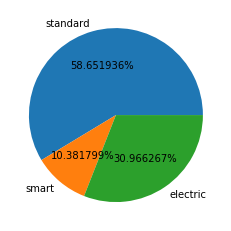

In [58]:
plt.pie([len(df[df['bike_type'] =='standard']), len(df[df['bike_type'] =='smart']), len(df[df['bike_type'] =='electric'])],
       labels= ['standard', 'smart', 'electric'], autopct='%2f%%')
plt.show()

#### 4.6 Time 

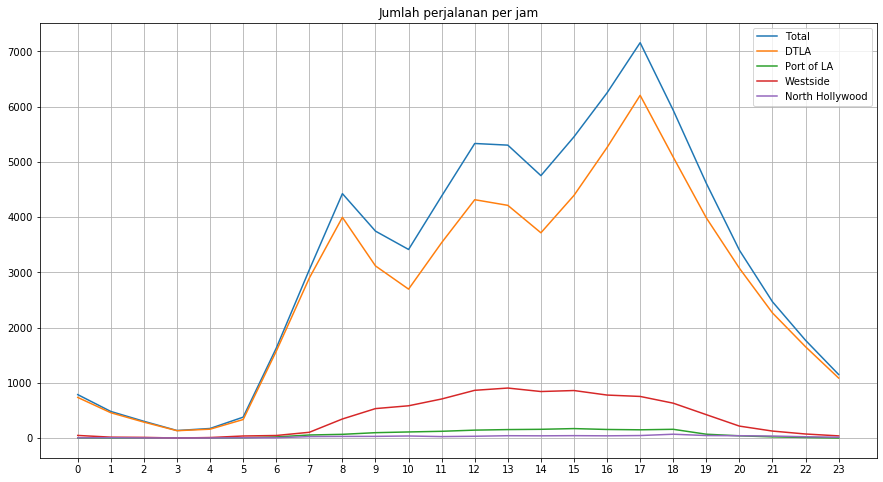

In [59]:
jumlahwaktu = df.groupby(['time'])['trip_id'].count()
west = df.groupby(['reg_start', 'time'])['trip_id'].count().loc['Westside']
west.loc[3] = 0
pola = df.groupby(['reg_start', 'time'])['trip_id'].count().loc['Port of LA']
pola.loc[0] = 0
pola.loc[2] = 0
plt.figure(figsize = (15,8))
plt.plot(range(0,24), jumlahwaktu)
plt.plot(range(0,24), df.groupby(['reg_start', 'time'])['trip_id'].count().loc['DTLA'])
plt.plot(range(0,24), pola)
plt.plot(range(0,24), west)
plt.plot(range(0,24), df.groupby(['reg_start', 'time'])['trip_id'].count().loc['North Hollywood'])
plt.xticks(range(0,24))
plt.grid(True)
plt.title('Jumlah perjalanan per jam')
plt.legend(['Total', 'DTLA', 'Port of LA', 'Westside', 'North Hollywood'])
plt.show()

Dari grafik di atas dapat dilihat bahwa peak hour untuk region Port of LA dan Westside,cenderung sama yaitu antara jam 11.00 - 15.00 sedangkan untuk daerah down town peak time nya adalah jam 17.00

#### 4.7 Region (End)

In [60]:
df['reg_end'].unique()

array(['DTLA', 'Port of LA', 'Westside', 'North Hollywood'], dtype=object)

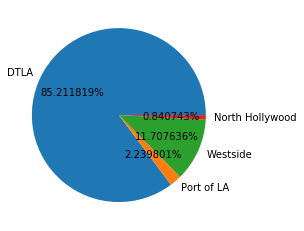

In [61]:
plt.pie([len(df[df['reg_end'] =='DTLA']), len(df[df['reg_end'] =='Port of LA']), len(df[df['reg_end'] =='Westside']), len(df[df['reg_end'] =='North Hollywood'])],
       labels= ['DTLA', 'Port of LA', 'Westside', 'North Hollywood'], autopct='%2f%%')
plt.show()

### Feature Exploration: Data to be Modelled

#### 4.6 Region (Start)

In [62]:
df['reg_start'].unique()

array(['DTLA', 'Port of LA', 'Westside', 'North Hollywood'], dtype=object)

In [63]:
region_start = pd.get_dummies(df['reg_start']) 
df = pd.concat([df, region_start[['Port of LA', 'DTLA', 'North Hollywood']]], axis = 1)

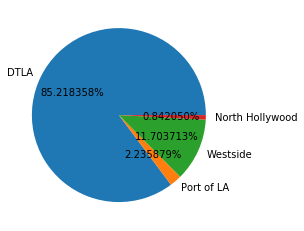

In [64]:
plt.pie([len(df[df['reg_start'] =='DTLA']), len(df[df['reg_start'] =='Port of LA']), len(df[df['reg_start'] =='Westside']), len(df[df['reg_start'] =='North Hollywood'])],
       labels= ['DTLA', 'Port of LA', 'Westside', 'North Hollywood'], autopct='%2f%%')
plt.show()

#### 4.7 Temperature

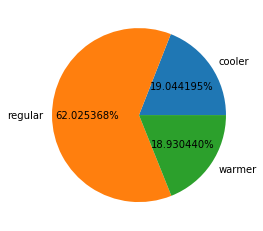

In [65]:
plt.pie([len(df[df['temp_class']==0]), len(df[df['temp_class']==1]), len(df[df['temp_class']==2])], autopct='%2f%%',  labels= ['cooler', 'regular', 'warmer'])
plt.show()

#### 4.8 Rain

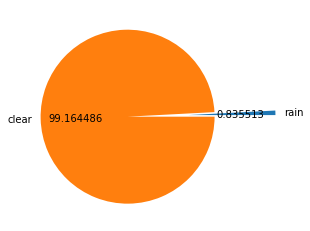

In [66]:
plt.pie([len(df[df['rain']==1]), len(df[df['rain']==0])], autopct='%2f', explode=[0,0.7], labels= ['rain', 'clear'])
plt.show()

#### 4.9 Weekend/ Weekday

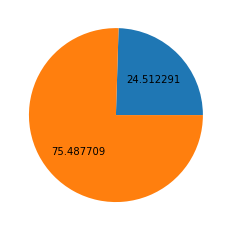

In [67]:
plt.pie([len(df[df['weekend']==1]), len(df[df['weekend']==0])], autopct='%2f')
plt.show()

#### 4.10 Walk Score

In [68]:
dfstat['walk_score'].describe()

count    226.000000
mean      85.814159
std       14.196118
min       10.000000
25%       82.000000
50%       91.000000
75%       94.000000
max       99.000000
Name: walk_score, dtype: float64

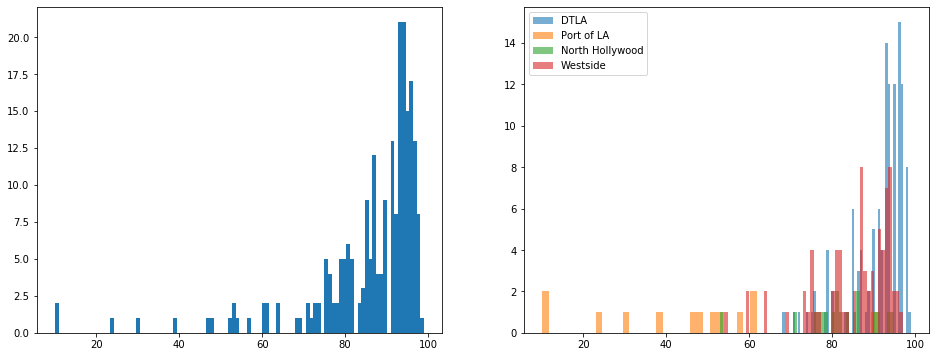

In [69]:
plt.figure(figsize = (16,6))
plt.subplot(121)
plt.hist(dfstat['walk_score'], bins =100)
plt.subplot(122)
plt.hist(dfstat[dfstat['statreg']=='DTLA']['walk_score'], bins =50, alpha=0.6)
plt.hist(dfstat[dfstat['statreg']=='Port of LA']['walk_score'], bins =50, alpha=0.6)
plt.hist(dfstat[dfstat['statreg']=='North Hollywood']['walk_score'], bins =50, alpha=0.6)
plt.hist(dfstat[dfstat['statreg']=='Westside']['walk_score'], bins =50, alpha=0.6)
plt.legend(['DTLA', 'Port of LA', 'North Hollywood', 'Westside'])
plt.show()

Distribusi walk score berbentuk skew negatif. 

#### 4.11 Bike Score

In [70]:
dfstat['bike_score'].describe()

count    226.000000
mean      76.084071
std       13.642320
min       24.000000
25%       67.000000
50%       77.000000
75%       86.000000
max      100.000000
Name: bike_score, dtype: float64

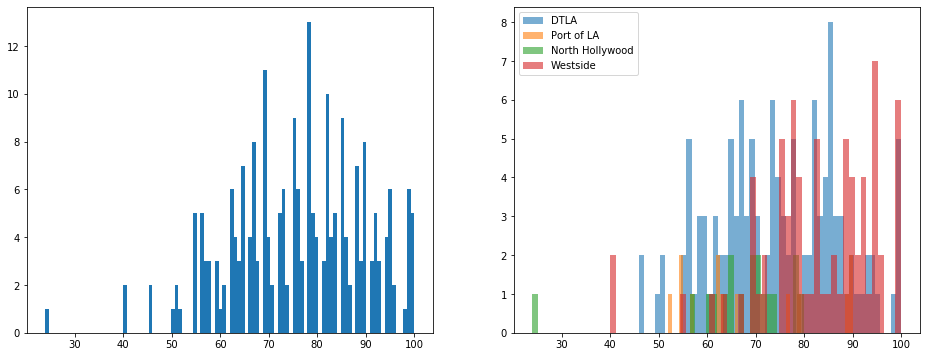

In [71]:
plt.figure(figsize = (16,6))
plt.subplot(121)
plt.hist(dfstat['bike_score'], bins =100)
plt.subplot(122)
plt.hist(dfstat[dfstat['statreg']=='DTLA']['bike_score'], bins =50, alpha=0.6)
plt.hist(dfstat[dfstat['statreg']=='Port of LA']['bike_score'], bins =50, alpha=0.6)
plt.hist(dfstat[dfstat['statreg']=='North Hollywood']['bike_score'], bins =50, alpha=0.6)
plt.hist(dfstat[dfstat['statreg']=='Westside']['bike_score'], bins =50, alpha=0.6)
plt.legend(['DTLA', 'Port of LA', 'North Hollywood', 'Westside'])
plt.show()

#### 4.12 Transit Score

In [72]:
dfstat['transit_score'].describe()

count    226.000000
mean      70.193743
std       20.591981
min       18.000000
25%       55.000000
50%       67.000000
75%       87.000000
max      100.000000
Name: transit_score, dtype: float64

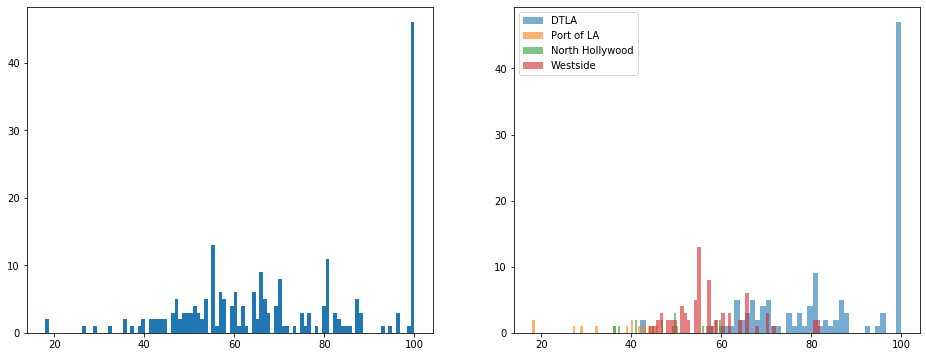

In [73]:
plt.figure(figsize = (16,6))
plt.subplot(121)
plt.hist(dfstat['transit_score'], bins =100)
plt.subplot(122)
plt.hist(dfstat[dfstat['statreg']=='DTLA']['transit_score'], bins =50, alpha=0.6)
plt.hist(dfstat[dfstat['statreg']=='Port of LA']['transit_score'], bins =50, alpha=0.6)
plt.hist(dfstat[dfstat['statreg']=='North Hollywood']['transit_score'], bins =50, alpha=0.6)
plt.hist(dfstat[dfstat['statreg']=='Westside']['transit_score'], bins =50, alpha=0.6)
plt.legend(['DTLA', 'Port of LA', 'North Hollywood', 'Westside'])
plt.show()

#### 4.13 Distance to Region Center

In [74]:
dfstat['dist_creg'].describe()

count    226.000000
mean       0.028377
std        0.016680
min        0.000900
25%        0.017625
50%        0.026800
75%        0.036225
max        0.168000
Name: dist_creg, dtype: float64

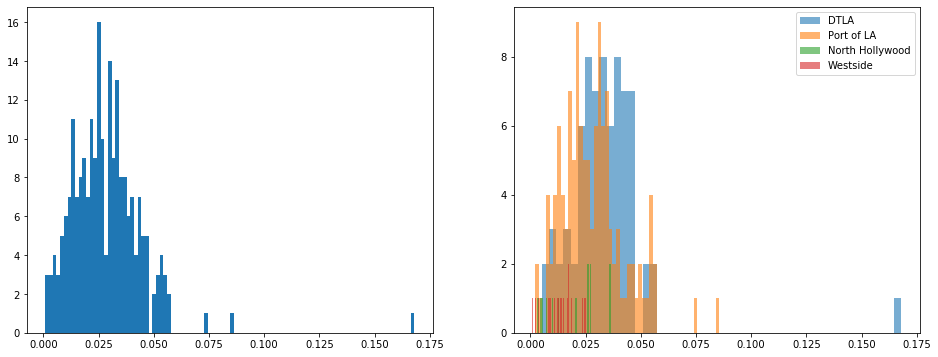

In [75]:
plt.figure(figsize = (16,6))
plt.subplot(121)
plt.hist(dfstat['dist_creg'], bins =100)
plt.subplot(122)
plt.hist(dfstat[dfstat['statreg']=='Westside']['dist_creg'], bins =50, alpha=0.6)
plt.hist(dfstat[dfstat['statreg']=='DTLA']['dist_creg'], bins =50, alpha=0.6)
plt.hist(dfstat[dfstat['statreg']=='Port of LA']['dist_creg'], bins =50, alpha=0.6)
plt.hist(dfstat[dfstat['statreg']=='North Hollywood']['dist_creg'], bins =50, alpha=0.6)
plt.legend(['DTLA', 'Port of LA', 'North Hollywood', 'Westside'])
plt.show()

<b> Menyimpan DataFrame ke CSV</b>

In [76]:
df.to_csv('df.csv')

In [77]:
dfstat.to_csv('dfstat.csv')

### 5. Menggabungkan Dataframe Trips dan Stations

Dengan tujuan membuat model yang dapat memprediksi besar demand di stasiun bike sharing berdasarkan hari dan karakteristik stasiun, dibentuk dataframe baru berdasarkan informasi yang sudah ada sebelumnya:

In [100]:
dfx = (df[['trip_id', 'start_station', 'weekend', 'rain', 'temp_class',
       'North Hollywood', 'Port of LA', 'DTLA']]).groupby(['start_station', 'weekend', 'rain', 'temp_class',
       'North Hollywood', 'Port of LA', 'DTLA'], as_index=False).count()
dfx = dfx.rename(columns={'trip_id':'total_trip', 'start_station':'station_id'})

In [101]:
dfx.head()

,station_id,weekend,rain,temp_class,North Hollywood,Port of LA,DTLA,total_trip
0,3005,0,0,0.0,0,0,1,557
1,3005,0,0,1.0,0,0,1,1822
2,3005,0,0,2.0,0,0,1,609
3,3005,0,1,0.0,0,0,1,28
4,3005,0,1,1.0,0,0,1,4


In [102]:
dfx['stat_name'] = dfx['station_id'].apply(lambda x: dfstat[dfstat['statid']==x]['name'].iloc[0])
dfx['lat'] = dfx['station_id'].apply(lambda x: dfstat[dfstat['statid']==x]['statlat'].iloc[0])
dfx['long'] = dfx['station_id'].apply(lambda x: dfstat[dfstat['statid']==x]['statlong'].iloc[0])
dfx['walk_score'] = dfx['station_id'].apply(lambda x: dfstat[dfstat['statid']==x]['walk_score'].iloc[0])
dfx['transit_score'] = dfx['station_id'].apply(lambda x: dfstat[dfstat['statid']==x]['transit_score'].iloc[0])
dfx['bike_score'] = dfx['station_id'].apply(lambda x: dfstat[dfstat['statid']==x]['bike_score'].iloc[0])
dfx['dregioncenter'] = dfx['station_id'].apply(lambda x: dfstat[dfstat['statid']==x]['dist_creg'].iloc[0])

In [81]:
dfx.head(15)

,station_id,weekend,rain,temp_class,North Hollywood,Port of LA,DTLA,total_trip,stat_name,lat,long,walk_score,transit_score,bike_score,dregioncenter
0,3005,0,0,0.0,0,0,1,557,7th & Flower,34.04850,-118.258537,97,100.0,85,0.0114
1,3005,0,0,1.0,0,0,1,1822,7th & Flower,34.04850,-118.258537,97,100.0,85,0.0114
2,3005,0,0,2.0,0,0,1,609,7th & Flower,34.04850,-118.258537,97,100.0,85,0.0114
3,3005,0,1,0.0,0,0,1,28,7th & Flower,34.04850,-118.258537,97,100.0,85,0.0114
4,3005,0,1,1.0,0,0,1,4,7th & Flower,34.04850,-118.258537,97,100.0,85,0.0114
5,3005,1,0,0.0,0,0,1,161,7th & Flower,34.04850,-118.258537,97,100.0,85,0.0114
6,3005,1,0,1.0,0,0,1,523,7th & Flower,34.04850,-118.258537,97,100.0,85,0.0114
7,3005,1,0,2.0,0,0,1,139,7th & Flower,34.04850,-118.258537,97,100.0,85,0.0114
8,3005,1,1,0.0,0,0,1,2,7th & Flower,34.04850,-118.258537,97,100.0,85,0.0114
9,3006,0,0,0.0,0,0,1,272,Olive & 8th,34.04554,-118.256668,97,100.0,87,0.0147


Dari dataframe terbaru, kita mendapatkan satu variabel baru yang sebelumnya tidak ada: Jumlah Trip Per Stasiun. 
    
Untuk itu dilakukan visualisasi dan transformasi terlebih dahulu:

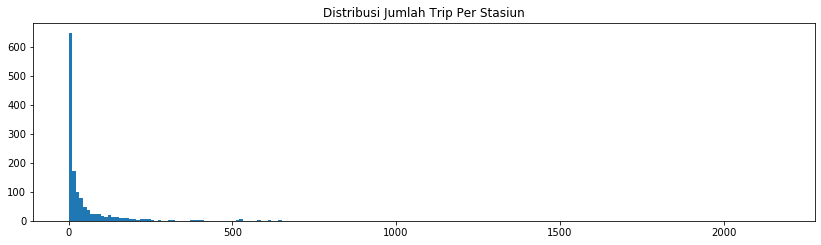

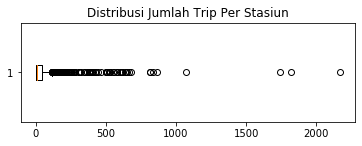

In [132]:
plt.figure(figsize = (14,8))
plt.subplot(211)
plt.hist(dfx['total_trip'], bins=200)
plt.title ('Distribusi Jumlah Trip Per Stasiun')
plt.show()
plt.subplot(212)
plt.boxplot(dfx['total_trip'], vert=False)
plt.title ('Distribusi Jumlah Trip Per Stasiun')
plt.show()

Dapat dilihat bahwa data sangat positive skewed, untuk itu akan dilakukan transformasi log sebagai berikut:

In [83]:
transformerlog = FunctionTransformer(np.log10, validate=True)
dfx['trip_log'] = transformerlog.transform(dfx[['total_trip']])

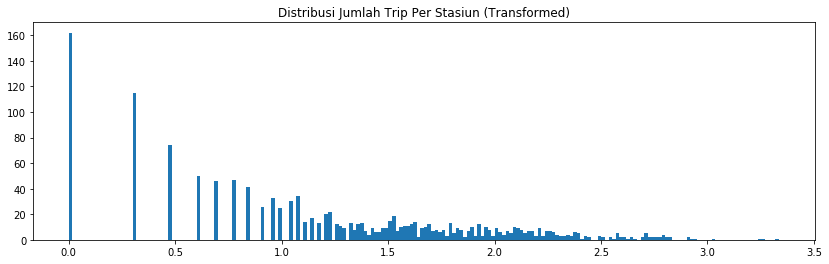

In [84]:
plt.figure(figsize = (14,4))
plt.hist(dfx['trip_log'], bins=200)
plt.title ('Distribusi Jumlah Trip Per Stasiun (Transformed)')
plt.show()

<b> save to csv </b>

In [85]:
dfx.to_csv('dfx.csv')

In [86]:
dfx

,station_id,weekend,rain,temp_class,North Hollywood,Port of LA,DTLA,total_trip,stat_name,lat,long,walk_score,transit_score,bike_score,dregioncenter,trip_log
0,3005,0,0,0.0,0,0,1,557,7th & Flower,34.048500,-118.258537,97,100.0,85,0.0114,2.745855
1,3005,0,0,1.0,0,0,1,1822,7th & Flower,34.048500,-118.258537,97,100.0,85,0.0114,3.260548
2,3005,0,0,2.0,0,0,1,609,7th & Flower,34.048500,-118.258537,97,100.0,85,0.0114,2.784617
3,3005,0,1,0.0,0,0,1,28,7th & Flower,34.048500,-118.258537,97,100.0,85,0.0114,1.447158
4,3005,0,1,1.0,0,0,1,4,7th & Flower,34.048500,-118.258537,97,100.0,85,0.0114,0.602060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1347,4493,0,0,0.0,0,0,1,1,Sunset Triangle Plaza,34.090279,-118.277191,96,58.0,76,0.0366,0.000000
1348,4493,0,0,1.0,0,0,1,5,Sunset Triangle Plaza,34.090279,-118.277191,96,58.0,76,0.0366,0.698970
1349,4493,0,1,0.0,0,0,1,2,Sunset Triangle Plaza,34.090279,-118.277191,96,58.0,76,0.0366,0.301030
1350,4493,1,0,0.0,0,0,1,1,Sunset Triangle Plaza,34.090279,-118.277191,96,58.0,76,0.0366,0.000000


<b> save to csv </b>